In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import mean_absolute_error, max_error, median_absolute_error

In [2]:
df = pd.read_csv('cars_ML.csv', sep='\t')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

km    price  HorsePower  Engine  doors  places  Automata  \
0      83100  3790000          75    1248      5       5         0   
1     127440  4199000         120    1560      5       5         0   
2      41416  4499000         125     999      5       5         0   
3     121904  4790000          84    1248      5       5         0   
4      94261  6950000         150    1395      5       5         0   
...      ...      ...         ...     ...    ...     ...       ...   
1777   21000  6299000         110    1199      5       5         0   
1778   97000  6300000         131    1995      4       3         0   
1779  110000  6300000         131    1995      4       3         0   
1780   52000  6338000         150    1495      5       5         0   
1781   74258  6350000         147    1495      5       5         1   

      Automatizált  Duplakuplung  Fokozatmentes  ...  SMART  SSANGYONG  \
0                0             0              0  ...      0          0   
1                0             0              0  ...      0          0   
2                0             0              0  ...      0          0   
3                0             0              0  ...      0          0   
4                0             0              0  ...      0          0   
...            ...           ...            ...  ...    ...        ...   
1777             0             0              0  ...      0          0   
1778             0             0              0  ...      0          0   
1779             0             0              0  ...      0          0   
1780             0             0              0  ...      0          0   
1781             0             0              0  ...      0          0   

      SUBARU  SUZUKI  TOYOTA  VOLKSWAGEN  VOLVO       Age  Location  \
0          0       0       0           0      0  5.505818         1   
1          0       0       0           0      0  5.672827         0   
2          0       0       0           0      0  6.505133         0   
3          0       0       0           0      0  5.169062         1   
4          0       0       0           0      0  6.587269         1   
...      ...     ...     ...         ...    ...       ...       ...   
1777       0       0       0           0      0  2.001369         0   
1778       0       0       0           0      0  4.169747         1   
1779       0       0       0           0      0  4.254620         1   
1780       0       0       0           0      0  4.254620         1   
1781       0       0       0           0      0  4.673511         0   

      Yearly_usage_in_km  
0           15093.125311  
1           22464.990347  
2            6366.664141  
3           23583.387712  
4           14309.572007  
...                  ...  
1777        10492.818057  
1778        23262.803677  
1779        25854.247104  
1780        12222.007722  
1781        15889.123902  

[1782 rows x 71 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km                            1782 non-null   int64  
 1   price                         1782 non-null   int64  
 2   HorsePower                    1782 non-null   int64  
 3   Engine                        1782 non-null   int64  
 4   doors                         1782 non-null   int64  
 5   places                        1782 non-null   int64  
 6   Automata                      1782 non-null   int64  
 7   Automatizált                  1782 non-null   int64  
 8   Duplakuplung                  1782 non-null   int64  
 9   Fokozatmentes                 1782 non-null   int64  
 10  Manuális                      1782 non-null   int64  
 11  Tiptronic                     1782 non-null   int64  
 12  Eladó                         1782 non-null   int64  
 13  Ben

In [5]:
df.describe()

km         price   HorsePower       Engine        doors  \
count    1782.000000  1.782000e+03  1782.000000  1782.000000  1782.000000   
mean   170490.331089  4.312280e+06   129.057800  1713.416947     4.599888   
std     88426.539308  5.030865e+06    65.731982   526.696738     0.737889   
min         0.000000  4.950000e+05     4.000000   408.000000     2.000000   
25%    111256.250000  1.999000e+06    95.000000  1396.000000     4.000000   
50%    164584.000000  3.290000e+06   116.000000  1596.000000     5.000000   
75%    220395.500000  4.995000e+06   147.000000  1969.000000     5.000000   
max    610000.000000  1.200000e+08  1498.000000  5700.000000     5.000000   

            places     Automata  Automatizált  Duplakuplung  Fokozatmentes  \
count  1782.000000  1782.000000   1782.000000   1782.000000    1782.000000   
mean      4.823232     0.048260      0.002245      0.034231       0.038721   
std       0.965235     0.214376      0.047338      0.181874       0.192982   
min       2.000000     0.000000      0.000000      0.000000       0.000000   
25%       5.000000     0.000000      0.000000      0.000000       0.000000   
50%       5.000000     0.000000      0.000000      0.000000       0.000000   
75%       5.000000     0.000000      0.000000      0.000000       0.000000   
max       9.000000     1.000000      1.000000      1.000000       1.000000   

       ...        SMART    SSANGYONG       SUBARU       SUZUKI       TOYOTA  \
count  ...  1782.000000  1782.000000  1782.000000  1782.000000  1782.000000   
mean   ...     0.004489     0.000561     0.004489     0.028058     0.037037   
std    ...     0.066871     0.023689     0.066871     0.165186     0.188906   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
75%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

        VOLKSWAGEN        VOLVO          Age     Location  Yearly_usage_in_km  
count  1782.000000  1782.000000  1782.000000  1782.000000         1782.000000  
mean      0.085859     0.016835    10.790342     0.332772        17889.571503  
std       0.280234     0.128689     5.910016     0.471338        10809.838035  
min       0.000000     0.000000     0.169747     0.000000            0.000000  
25%       0.000000     0.000000     6.086242     0.000000        11155.902298  
50%       0.000000     0.000000     9.749487     0.000000        15959.336418  
75%       0.000000     0.000000    14.812457     1.000000        22295.060846  
max       1.000000     1.000000    48.169747     1.000000       147898.839118  

[8 rows x 71 columns]

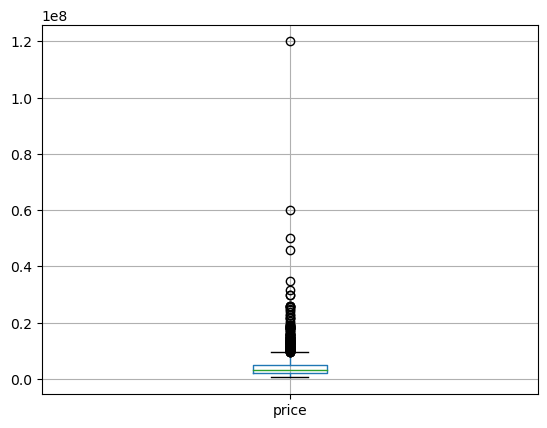

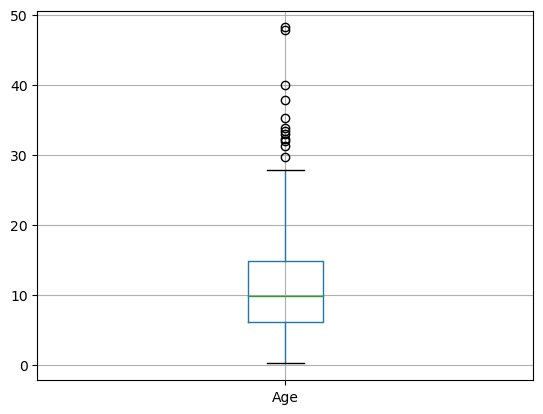

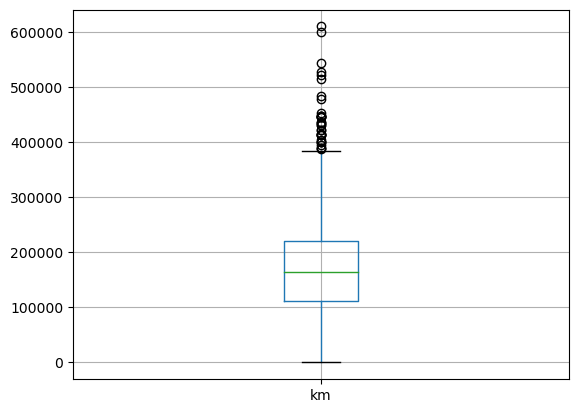

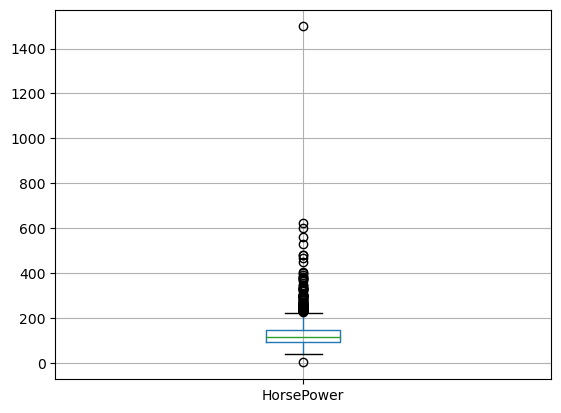

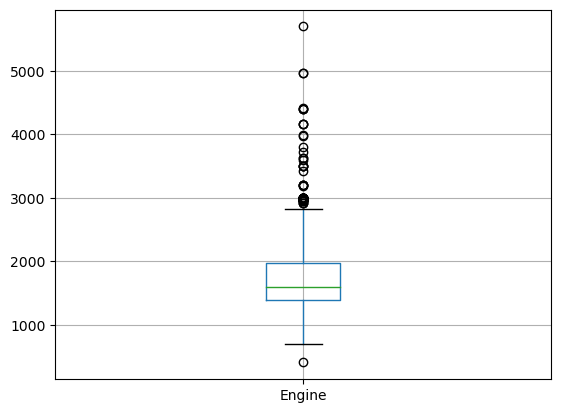

In [6]:
df.boxplot(column=['price'])
plt.show()
df.boxplot(column=['Age'])
plt.show()
df.boxplot(column=['km'])
plt.show()
df.boxplot(column=['HorsePower'])
plt.show()
df.boxplot(column=['Engine'])
plt.show()

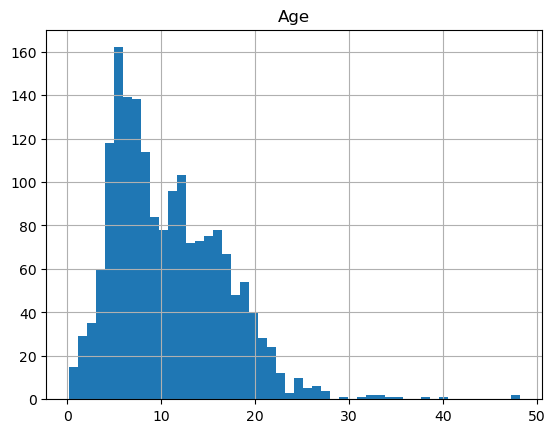

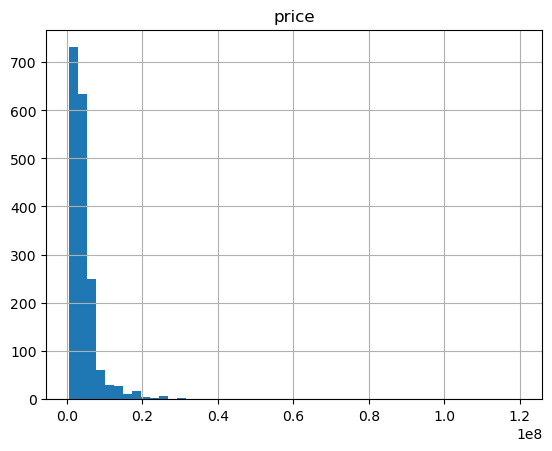

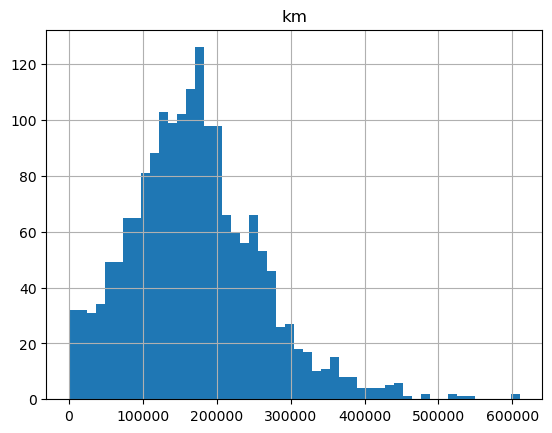

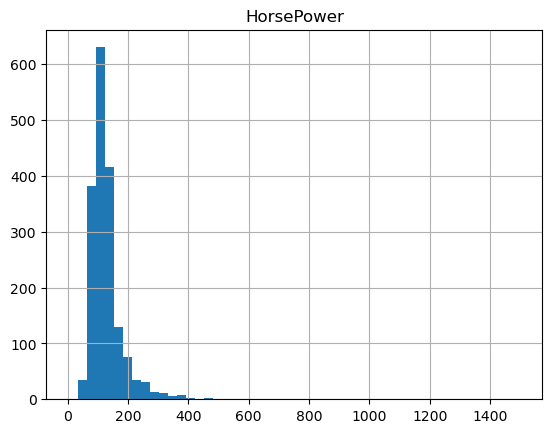

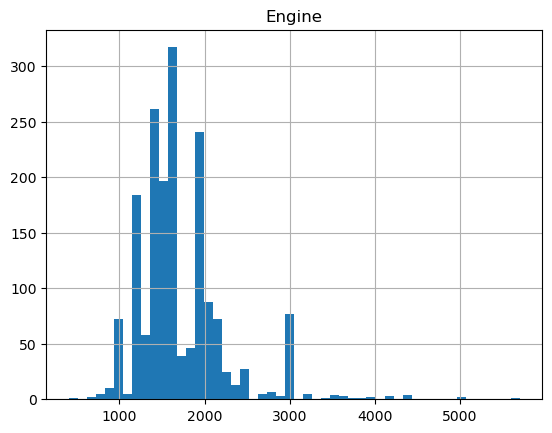

In [7]:
df.hist(column='Age', bins=50)
plt.show()
df.hist(column='price', bins=50)
plt.show()
df.hist(column='km', bins=50)
plt.show()
df.hist(column='HorsePower', bins=50)
plt.show()
df.hist(column='Engine', bins=50)
plt.show()

In [8]:
q1_hp = np.percentile(df.HorsePower, 25)
q3_hp = np.percentile(df.HorsePower, 75)
iqr = q3_hp-q1_hp

df = df[((q1_hp-1.5*iqr) < df['HorsePower']) & (df['HorsePower'] < (q3_hp + 1.5*iqr))]

q1_e = np.percentile(df.Engine, 25)
q3_e = np.percentile(df.Engine, 75)
iqr = q3_e-q1_e

df = df[((q1_e-1.5*iqr) < df['Engine']) & (df['Engine'] < (q3_e + 1.5*iqr))]

q1_km = np.percentile(df.km, 25)
q3_km = np.percentile(df.km, 75)
iqr = q3_km-q1_km

df = df[((q1_km-1.5*iqr) < df['km']) & (df['km'] < (q3_km + 1.5*iqr))]

q1_p = np.percentile(df.price, 25)
q3_p = np.percentile(df.price, 75)
iqr = q3_p-q1_p

df = df[((q1_p-1.5*iqr) < df['price']) & (df['price'] < (q3_p + 1.5*iqr))]

df

km    price  HorsePower  Engine  doors  places  Automata  \
0      83100  3790000          75    1248      5       5         0   
1     127440  4199000         120    1560      5       5         0   
2      41416  4499000         125     999      5       5         0   
3     121904  4790000          84    1248      5       5         0   
4      94261  6950000         150    1395      5       5         0   
...      ...      ...         ...     ...    ...     ...       ...   
1777   21000  6299000         110    1199      5       5         0   
1778   97000  6300000         131    1995      4       3         0   
1779  110000  6300000         131    1995      4       3         0   
1780   52000  6338000         150    1495      5       5         0   
1781   74258  6350000         147    1495      5       5         1   

      Automatizált  Duplakuplung  Fokozatmentes  ...  SMART  SSANGYONG  \
0                0             0              0  ...      0          0   
1                0             0              0  ...      0          0   
2                0             0              0  ...      0          0   
3                0             0              0  ...      0          0   
4                0             0              0  ...      0          0   
...            ...           ...            ...  ...    ...        ...   
1777             0             0              0  ...      0          0   
1778             0             0              0  ...      0          0   
1779             0             0              0  ...      0          0   
1780             0             0              0  ...      0          0   
1781             0             0              0  ...      0          0   

      SUBARU  SUZUKI  TOYOTA  VOLKSWAGEN  VOLVO       Age  Location  \
0          0       0       0           0      0  5.505818         1   
1          0       0       0           0      0  5.672827         0   
2          0       0       0           0      0  6.505133         0   
3          0       0       0           0      0  5.169062         1   
4          0       0       0           0      0  6.587269         1   
...      ...     ...     ...         ...    ...       ...       ...   
1777       0       0       0           0      0  2.001369         0   
1778       0       0       0           0      0  4.169747         1   
1779       0       0       0           0      0  4.254620         1   
1780       0       0       0           0      0  4.254620         1   
1781       0       0       0           0      0  4.673511         0   

      Yearly_usage_in_km  
0           15093.125311  
1           22464.990347  
2            6366.664141  
3           23583.387712  
4           14309.572007  
...                  ...  
1777        10492.818057  
1778        23262.803677  
1779        25854.247104  
1780        12222.007722  
1781        15889.123902  

[1531 rows x 71 columns]

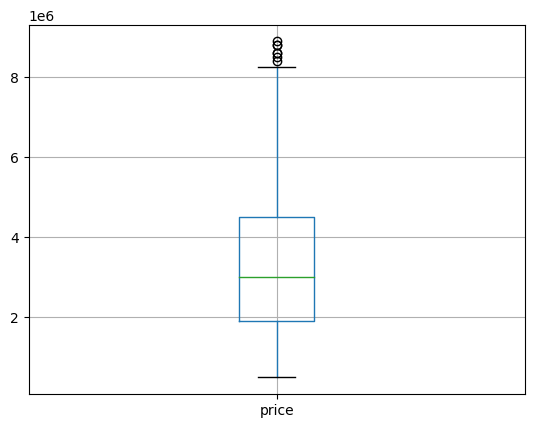

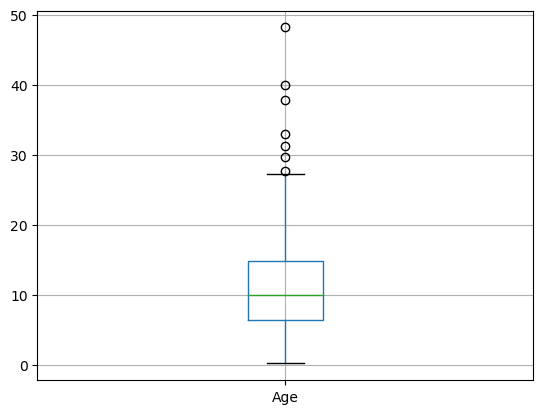

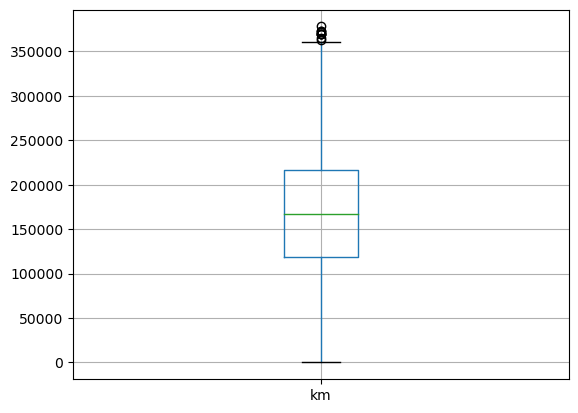

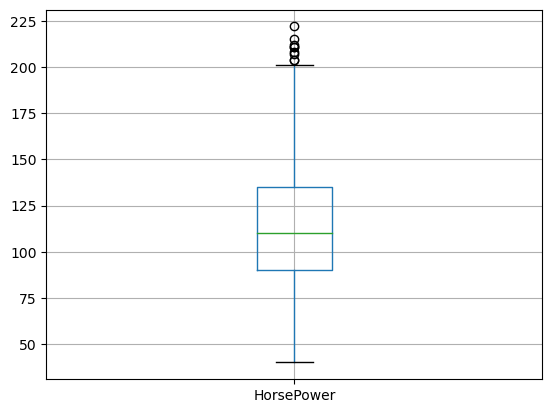

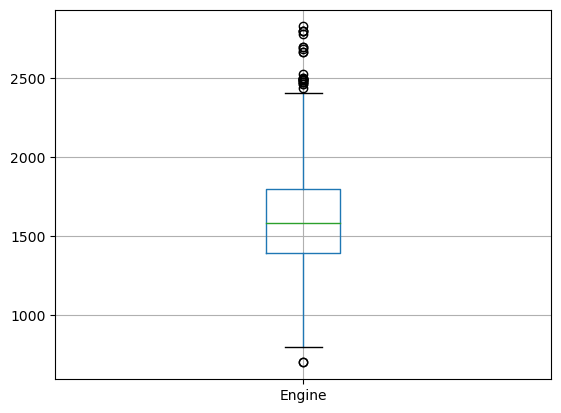

In [9]:
df.boxplot(column=['price'])
plt.show()
df.boxplot(column=['Age'])
plt.show()
df.boxplot(column=['km'])
plt.show()
df.boxplot(column=['HorsePower'])
plt.show()
df.boxplot(column=['Engine'])
plt.show()

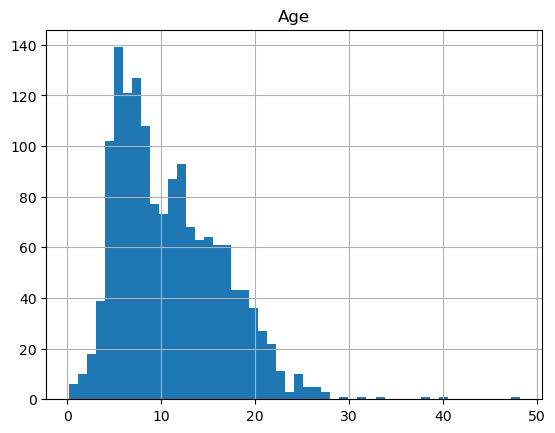

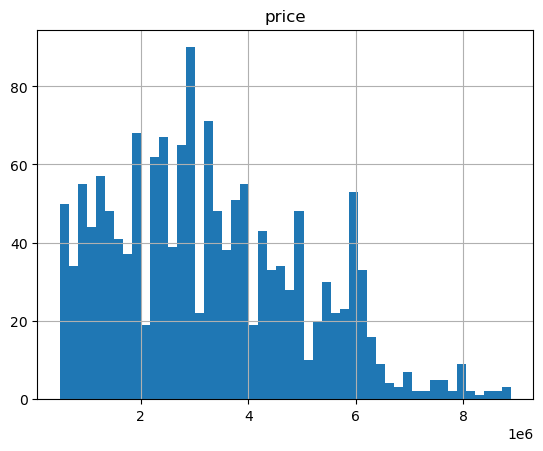

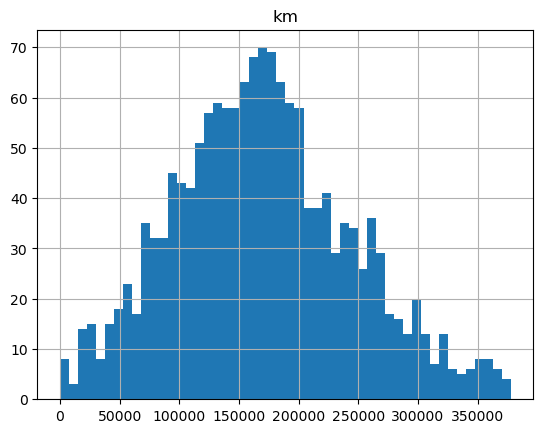

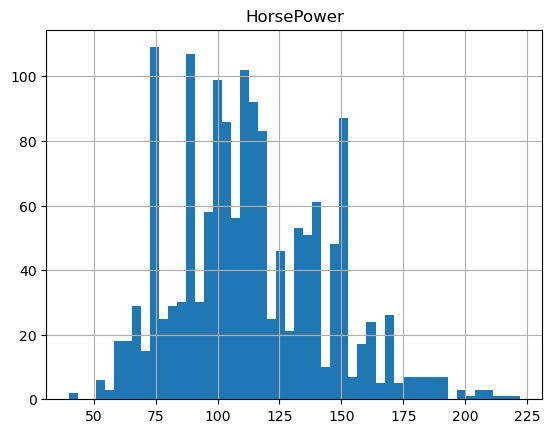

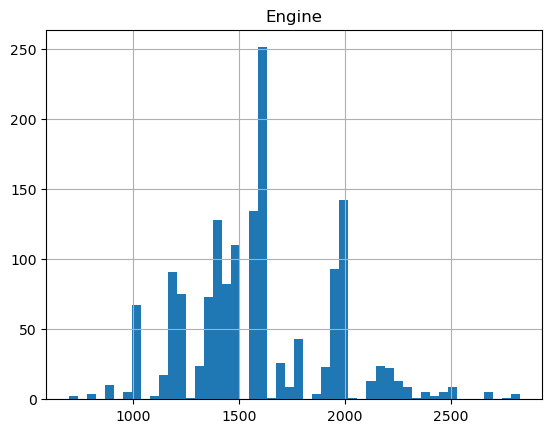

In [10]:
df.hist(column='Age', bins=50)
plt.show()
df.hist(column='price', bins=50)
plt.show()
df.hist(column='km', bins=50)
plt.show()
df.hist(column='HorsePower', bins=50)
plt.show()
df.hist(column='Engine', bins=50)
plt.show()

In [11]:
target_correlations = df.corr()['price'].apply(abs).dropna().sort_values()
target_correlations[-20:]

SKODA                           0.088553
RENAULT                         0.099002
Engine                          0.112185
Dízel                           0.117694
Benzin                          0.143088
Hibrid                          0.148532
Minősített magánszemély         0.151041
Fokozatmentes                   0.152367
Automata                        0.165452
Tiptronic                       0.176029
doors                           0.190538
Duplakuplung                    0.219926
Márkakereskedő                  0.267135
Minősített Prémium kereskedő    0.304715
Yearly_usage_in_km              0.311703
Manuális                        0.352932
km                              0.450465
HorsePower                      0.469454
Age                             0.739190
price                           1.000000
Name: price, dtype: float64

In [12]:
selected_features = target_correlations[-20:].index
df_2 = df[selected_features]
df_2

SKODA  RENAULT  Engine  Dízel  Benzin  Hibrid  Minősített magánszemély  \
0         0        0    1248      0       1       0                        0   
1         0        0    1560      1       0       0                        0   
2         0        0     999      0       1       0                        0   
3         0        0    1248      0       1       0                        0   
4         1        0    1395      0       1       0                        0   
...     ...      ...     ...    ...     ...     ...                      ...   
1777      0        0    1199      0       1       0                        0   
1778      0        0    1995      1       0       0                        0   
1779      0        0    1995      1       0       0                        0   
1780      1        0    1495      0       1       0                        0   
1781      1        0    1495      0       1       0                        0   

      Fokozatmentes  Automata  Tiptronic  doors  Duplakuplung  Márkakereskedő  \
0                 0         0          0      5             0               1   
1                 0         0          0      5             0               0   
2                 0         0          0      5             0               0   
3                 0         0          0      5             0               1   
4                 0         0          0      5             0               1   
...             ...       ...        ...    ...           ...             ...   
1777              0         0          0      5             0               1   
1778              0         0          0      4             0               1   
1779              0         0          0      4             0               1   
1780              0         0          0      5             0               1   
1781              0         1          0      5             0               0   

      Minősített Prémium kereskedő  Yearly_usage_in_km  Manuális      km  \
0                                0        15093.125311         1   83100   
1                                1        22464.990347         1  127440   
2                                1         6366.664141         1   41416   
3                                0        23583.387712         1  121904   
4                                0        14309.572007         1   94261   
...                            ...                 ...       ...     ...   
1777                             0        10492.818057         1   21000   
1778                             0        23262.803677         1   97000   
1779                             0        25854.247104         1  110000   
1780                             0        12222.007722         1   52000   
1781                             1        15889.123902         0   74258   

      HorsePower       Age    price  
0             75  5.505818  3790000  
1            120  5.672827  4199000  
2            125  6.505133  4499000  
3             84  5.169062  4790000  
4            150  6.587269  6950000  
...          ...       ...      ...  
1777         110  2.001369  6299000  
1778         131  4.169747  6300000  
1779         131  4.254620  6300000  
1780         150  4.254620  6338000  
1781         147  4.673511  6350000  

[1531 rows x 20 columns]

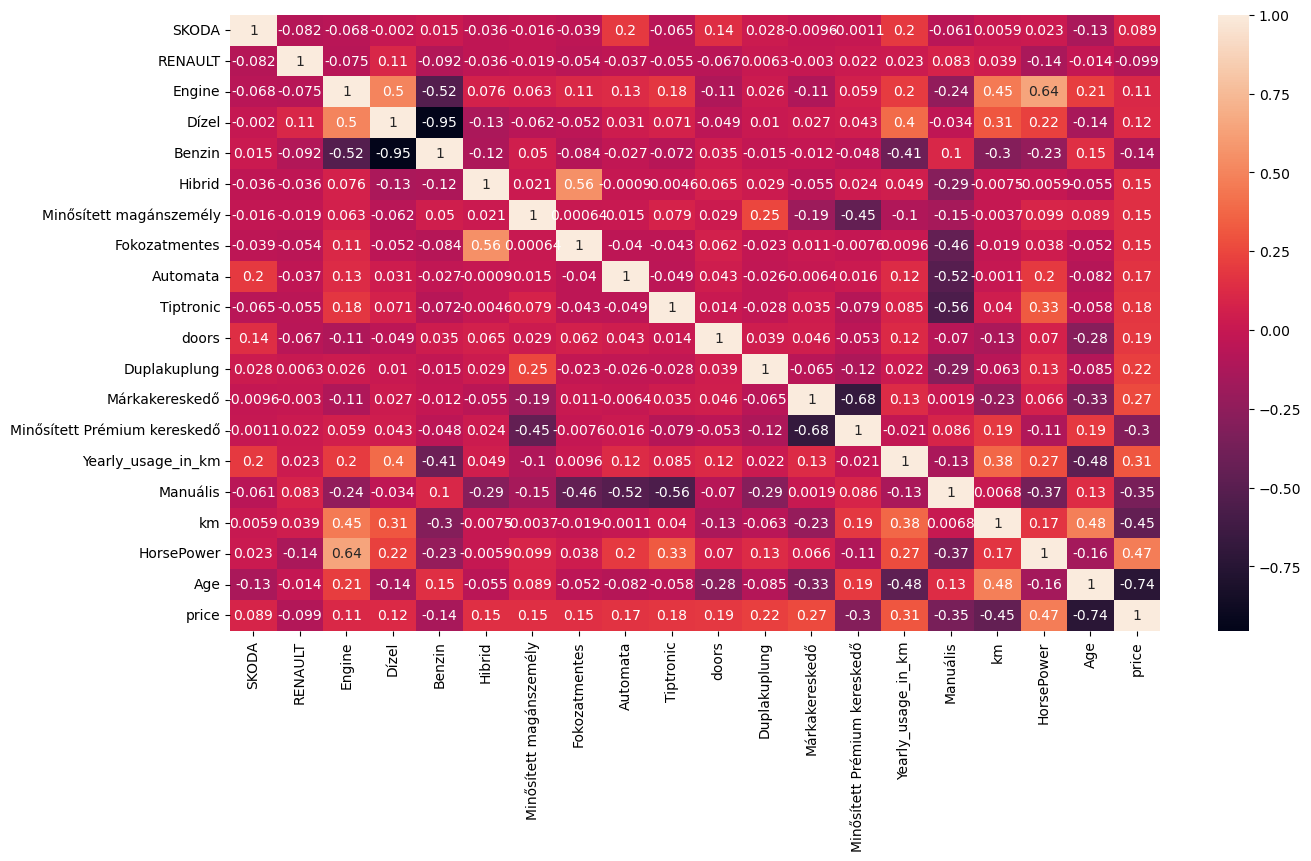

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df_2.corr(), annot=True)
plt.show()

In [14]:
X = df.drop('price', axis=1)
y = df.price

X_2 = df_2.drop('price', axis=1)
y_2 = df_2.price

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2, test_size=0.2, random_state=42)

In [16]:
reg = LinearRegression()
forest = RandomForestRegressor(n_estimators = 250, min_samples_split=8, random_state=1)
gbreg = GradientBoostingRegressor(n_estimators = 250, min_samples_split=8, random_state=1)

reg.fit(X_train,y_train)
forest.fit(X_train,y_train)
gbreg.fit(X_train,y_train)

GradientBoostingRegressor(min_samples_split=8, n_estimators=250, random_state=1)

In [17]:
reg.score(X_test,y_test)

0.808549064754286

In [18]:
forest.score(X_test,y_test)

0.8781332648442662

In [19]:
gbreg.score(X_test,y_test)

0.8819799228885886

In [20]:
mean_absolute_error(y_test, reg.predict(X_test))

575600.9011021343

In [21]:
mean_absolute_error(y_test, forest.predict(X_test))

439177.9131711305

In [22]:
mean_absolute_error(y_test, gbreg.predict(X_test))

449898.4001816145

In [23]:
reg.fit(X_2_train,y_2_train)
forest.fit(X_2_train,y_2_train)
gbreg.fit(X_2_train,y_2_train)

GradientBoostingRegressor(min_samples_split=8, n_estimators=250, random_state=1)

In [24]:
reg.score(X_2_test,y_2_test)

0.7967843181067693

In [25]:
forest.score(X_2_test,y_2_test)

0.8645889688464686

In [26]:
gbreg.score(X_2_test,y_2_test)

0.8607305707787751

In [27]:
mean_absolute_error(y_2_test, reg.predict(X_2_test))

601768.5354969957

In [28]:
mean_absolute_error(y_test, forest.predict(X_2_test))

461680.96134237124

In [29]:
mean_absolute_error(y_test, gbreg.predict(X_2_test))

464518.396108717

In [30]:
params = {
    'n_estimators':[100,200,300],
    'max_depth':[None, 2,4,8],
    'min_samples_split': [2,4]
}

grid_search_forest = GridSearchCV(forest, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search_gbreg = GridSearchCV(gbreg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search_forest.fit(X_train,y_train)
grid_search_gbreg.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(min_samples_split=8,
                                                 n_estimators=250,
                                                 random_state=1),
             param_grid={'max_depth': [None, 2, 4, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
grid_search_forest.best_estimator_.score(X_test, y_test)

0.8777594108577264

In [32]:
grid_search_gbreg.best_estimator_.score(X_test,y_test)

0.8815261254068608

In [33]:
grid_search_forest.fit(X_2_train,y_2_train)
grid_search_gbreg.fit(X_2_train,y_2_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(min_samples_split=8,
                                                 n_estimators=250,
                                                 random_state=1),
             param_grid={'max_depth': [None, 2, 4, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
grid_search_forest.best_estimator_.score(X_2_test, y_2_test)

0.8614610104560632

In [35]:
grid_search_gbreg.best_estimator_.score(X_2_test,y_2_test)

0.8557530887839061

In [36]:
pred_X = grid_search_forest.best_estimator_.predict(X_2_test)

mean_absolute_error(y_2_test, pred_X)

460702.06277803634

In [37]:
pred_X_ = grid_search_gbreg.best_estimator_.predict(X_2_test)

mean_absolute_error(y_2_test, pred_X_)

468148.003144788

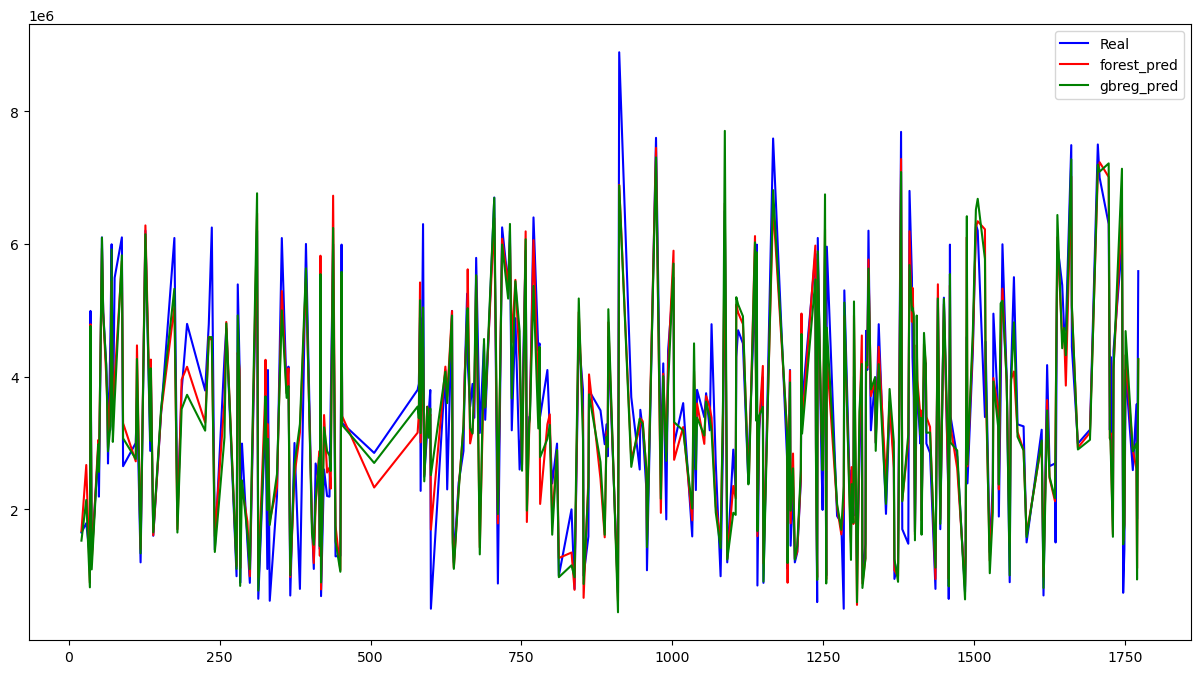

In [38]:
plt.figure(figsize=(15,8))
plt.plot(y_2_test.index.sort_values(), y_2_test, 'b', label='Real')
plt.plot(y_2_test.index.sort_values(), pred_X, 'r', label='forest_pred')
plt.plot(y_2_test.index.sort_values(), pred_X_,'g', label='gbreg_pred')
plt.legend()
plt.show()


In [39]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=y_2_test.index.sort_values(), y=y_2_test, mode='lines', name='Real'))
fig.add_trace(go.Scatter(x=y_2_test.index.sort_values(), y=pred_X, mode='lines', name='forest_pred'))
fig.add_trace(go.Scatter(x=y_2_test.index.sort_values(), y=pred_X_, mode='lines', name='gbreg_pred'))
fig.show()

In [40]:
median_absolute_error(y_2_test, pred_X_)

312770.6874147812

In [41]:
median_absolute_error(y_2_test, pred_X)

341090.01499999966

In [42]:
max_error(y_2_test, pred_X_)

2484593.679781391

In [43]:
max_error(y_2_test, pred_X)

2830694.8200000003